3.2 - Solve the problem
Alert incident in transactions: Implement the concept of a simple monitoring with real time alert with notifications to teams.

The monitoring works by receiving information about a transaction and inferring whether it is a failed or denied, or reversed or aprroved transaction. We work mostly with SQL, PromQL, Ruby and Python, but you can use any programming language that you want.

Please use the data of this csv and the data of this csv. Consider that transactions with the flag denied are transactions denied by risk of the issuers. Consider that transactions with the flag reversed or failed are transactions with problems. Note: F1 represents the quantity of transactions per minute from all pos from our costumers. So with this data you can see the diferent status per minute and see if it is going well or not. When you see the padron, you can predict a alarm for the anomaly.

Your Monitoring alert system must have at least: 1 endpoint that receives transaction data and returns a recommendation to “alert” the anomalies found in transactions. A query to organize the data on the data and a graphic to see the data in real time. A model to determine anomalies and a system to report the anomalies automatically.

You are free to determine the methods to approve/deny the transactions, but a few ways to do it are:
- rule-based - you define which cases get alerted based on predefined rules;
- score-base - you create a method/model (you could use machine learning models here if you want) to determine the anomaly -- score of a transaction and make your decision based on it;
- a combination of both;

Monitoring alert Requirements
- Alert transactions if failed transactions are above normal;
- Alert transactions if reversed transactions are above normal;
- Alert transactions if denied transactions are above normal;

In [1]:
# STATUS EXISTENTES POR DATA

import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

data_1 = pd.read_csv("transactions_1.csv")
data_1[['hour', 'minutes']] = data_1.time.str.split("h ", expand = True)

data_1 = ps.sqldf(f"""
SELECT
    status
FROM
    data_1
GROUP BY
    status
""")
print(data_1)

data_2 = pd.read_csv("transactions_2.csv")
data_2[['hour', 'minutes']] = data_2.time.str.split("h ", expand = True)

data_2 = ps.sqldf(f"""
SELECT
    status
FROM
    data_2
GROUP BY
    status
""")
print(data_2)


             status
0          approved
1  backend_reversed
2            denied
3            failed
4        processing
5          refunded
6          reversed
             status
0          approved
1  backend_reversed
2            denied
3            failed
4        processing
5          refunded
6          reversed


In [2]:
# GRÁFICO POR MINUTO

def plot_graph_min(doc, status, target=0):
    import pandas as pd
    import pandasql as ps
    import matplotlib.pyplot as plt

    data = pd.read_csv(doc)
    data[['hour', 'minutes']] = data.time.str.split("h ", expand = True)

    data = ps.sqldf(f"""
    SELECT
        *
    FROM
        data
    WHERE
        status = '{status}'
    """)

    qt_transactions = data.iloc[:,2].values

    plt.figure(figsize=(20,10))
    plt.plot(qt_transactions, linewidth=2, label=f"{status}_{doc}")
    if target != 0:
        plt.axhline(y=target, linestyle='-.', color='r', linewidth=1, label=f"{status}_target")
    plt.title("Transactions x Time", fontweight="bold")
    plt.xlabel("Minutes")
    plt.xticks([])
    plt.ylabel("Transactions")
    plt.legend()
    plt.show()

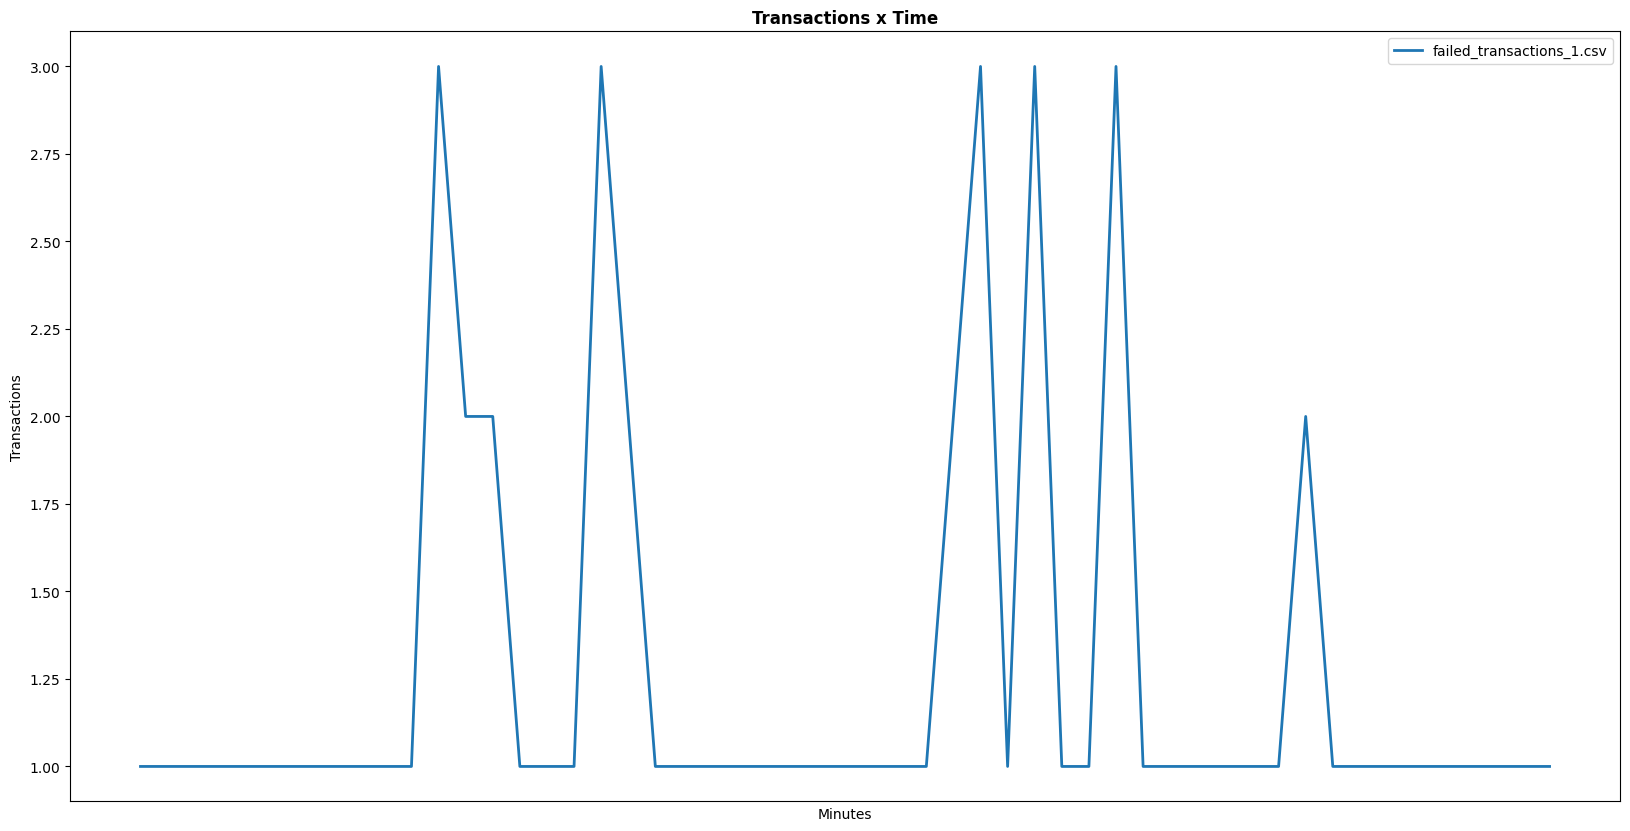

In [3]:
plot_graph_min('transactions_1.csv', 'failed')
# plot_graph_min('transactions_2.csv', 'failed')
# plot_graph_min('transactions_1.csv', 'reversed')
# plot_graph_min('transactions_2.csv', 'reversed')
# plot_graph_min('transactions_1.csv', 'denied')
# plot_graph_min('transactions_2.csv', 'denied')

In [4]:
# GRÁFICO POR HORA

def plot_graph_h(doc, status):
    import pandas as pd
    import pandasql as ps
    import matplotlib.pyplot as plt

    data_1 = pd.read_csv(doc)
    data_1[['hour', 'minutes']] = data_1.time.str.split("h ", expand = True)

    data_1_status = ps.sqldf(f"""
    SELECT
        SUM (ALL count) AS 'trans/h'
    FROM
        data_1
    WHERE
        status = '{status}'
    GROUP BY
        hour
    """)

    qt_trans_1 = data_1_status.iloc[:,0].values

    plt.figure(figsize=(20,10))
    plt.plot(qt_trans_1, linewidth=2, label=f"{status}_{doc}")
    plt.title("Transactions x Time", fontweight="bold")
    plt.xlabel("Hour")
    plt.xticks([])
    plt.ylabel("Transactions")
    plt.legend()
    plt.show()

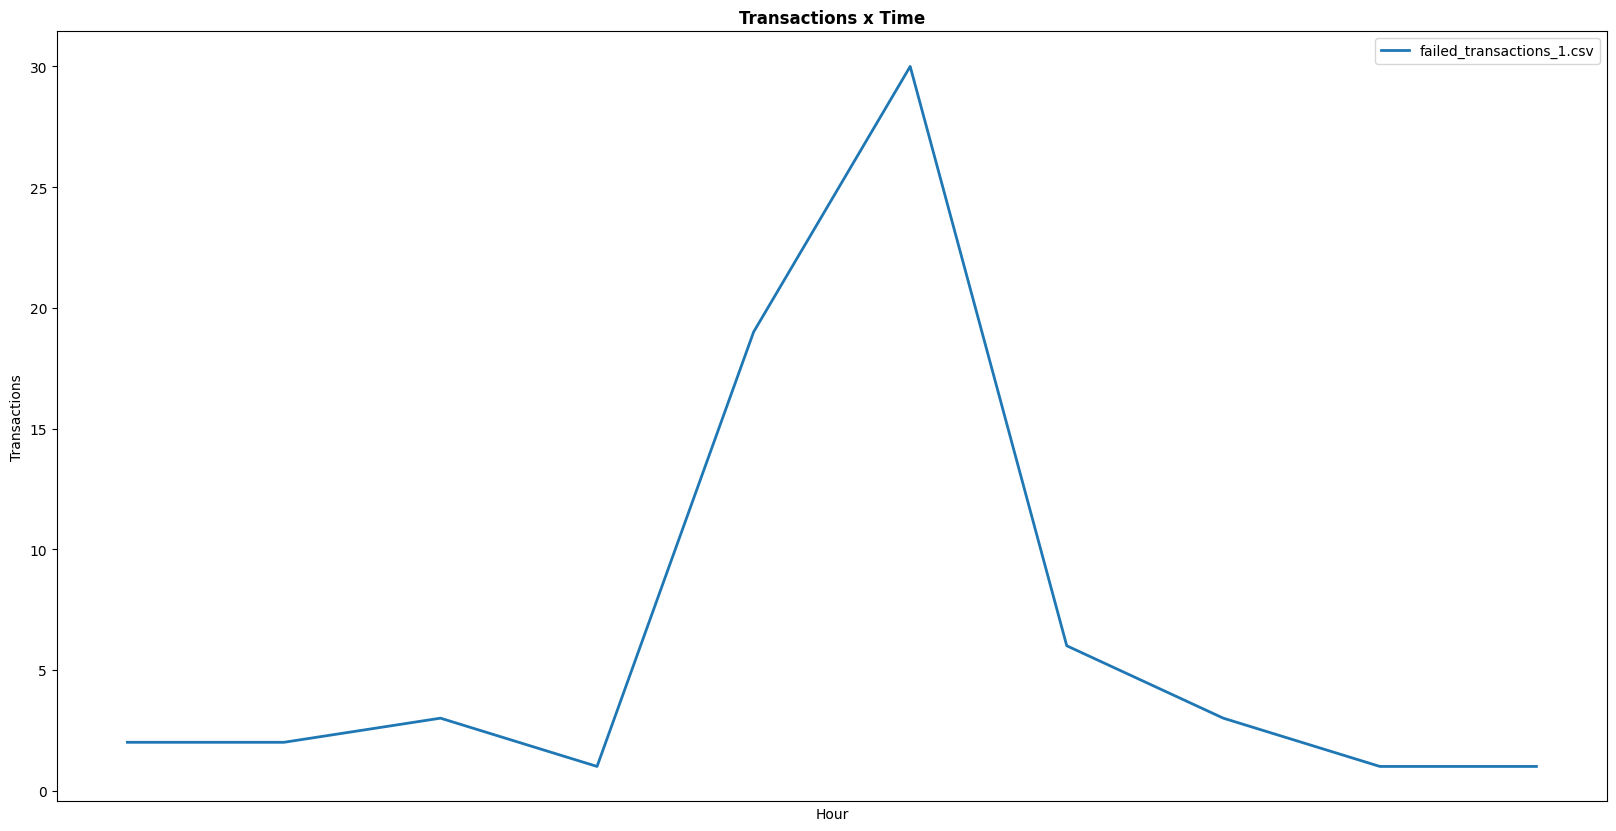

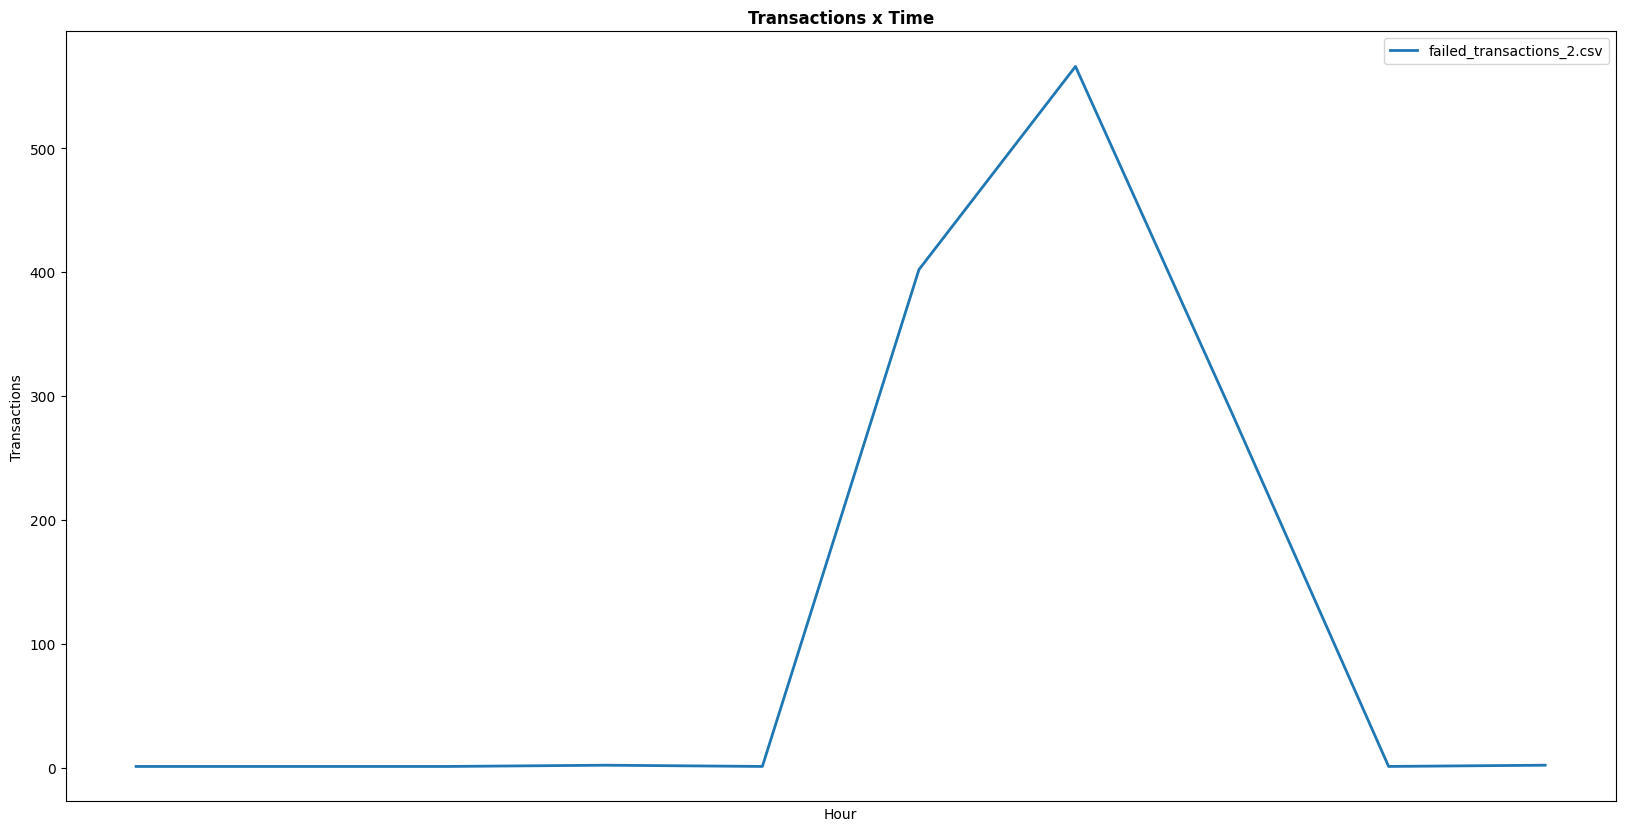

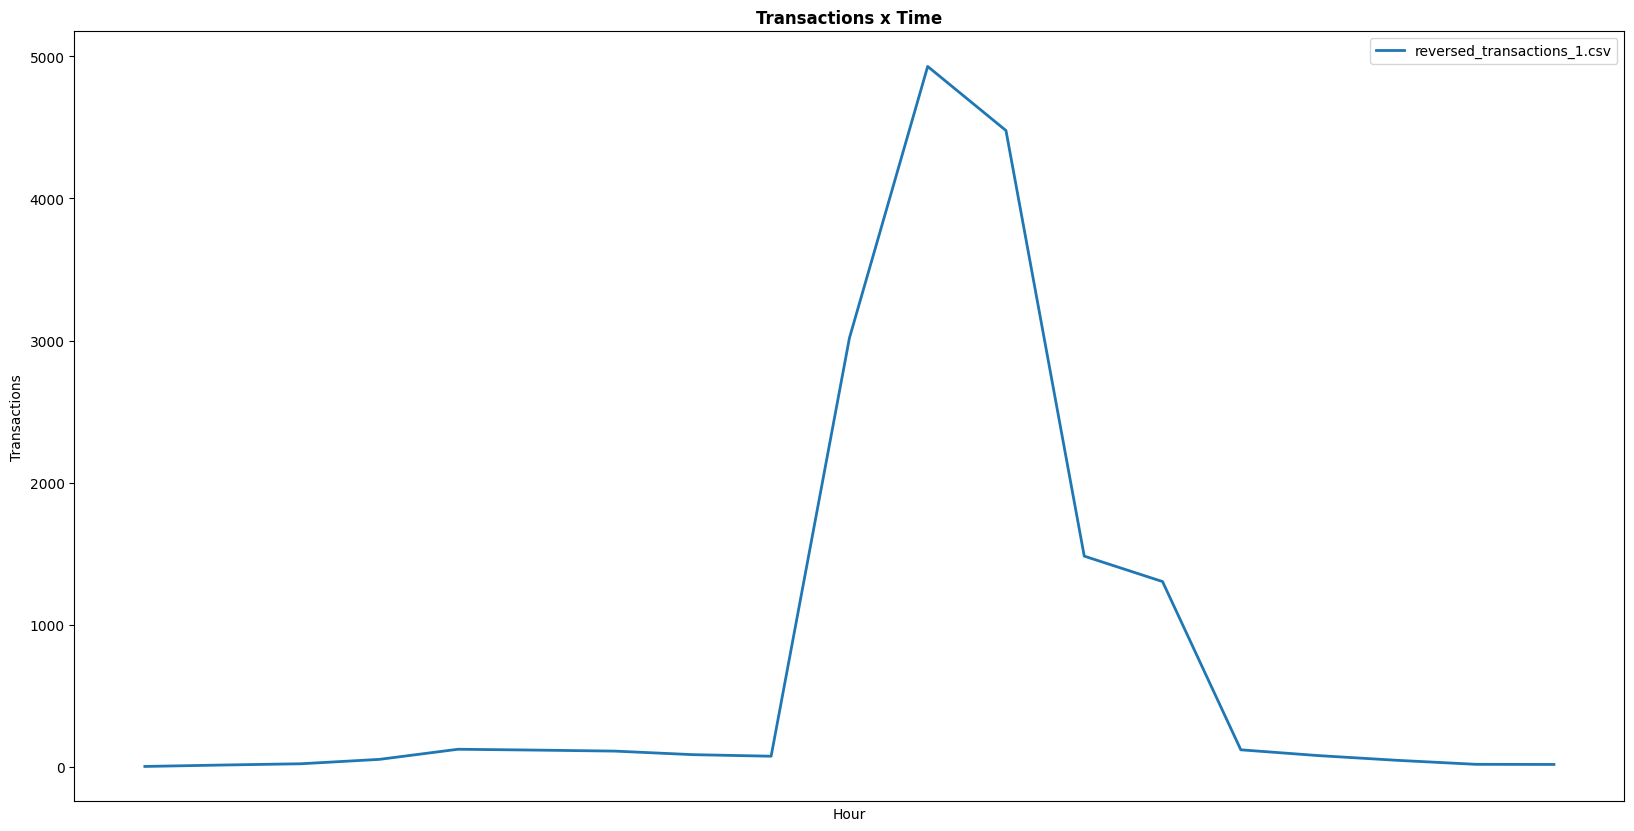

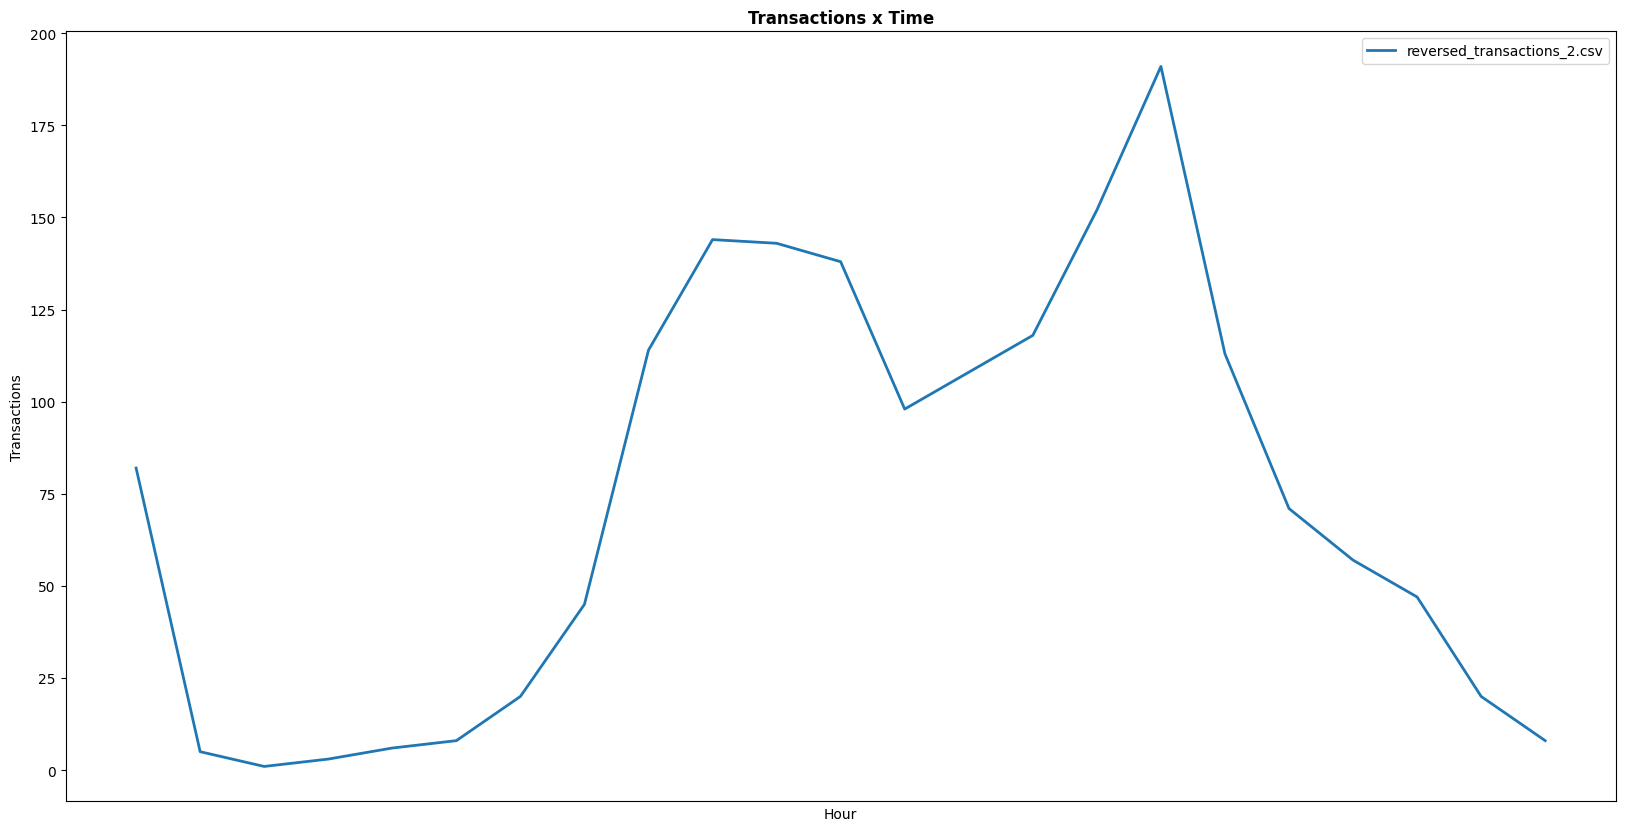

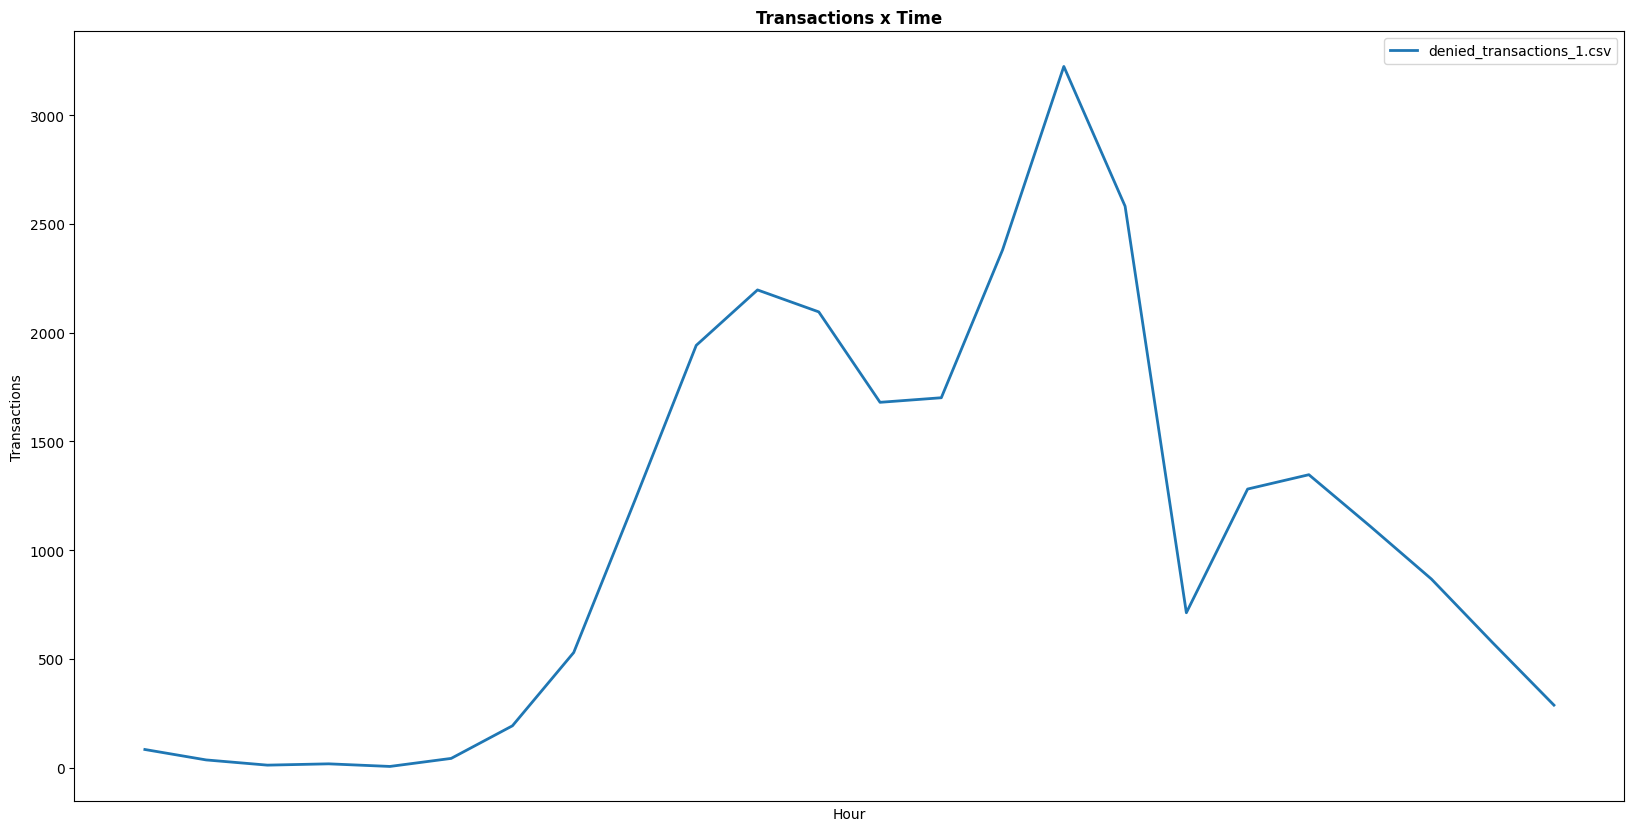

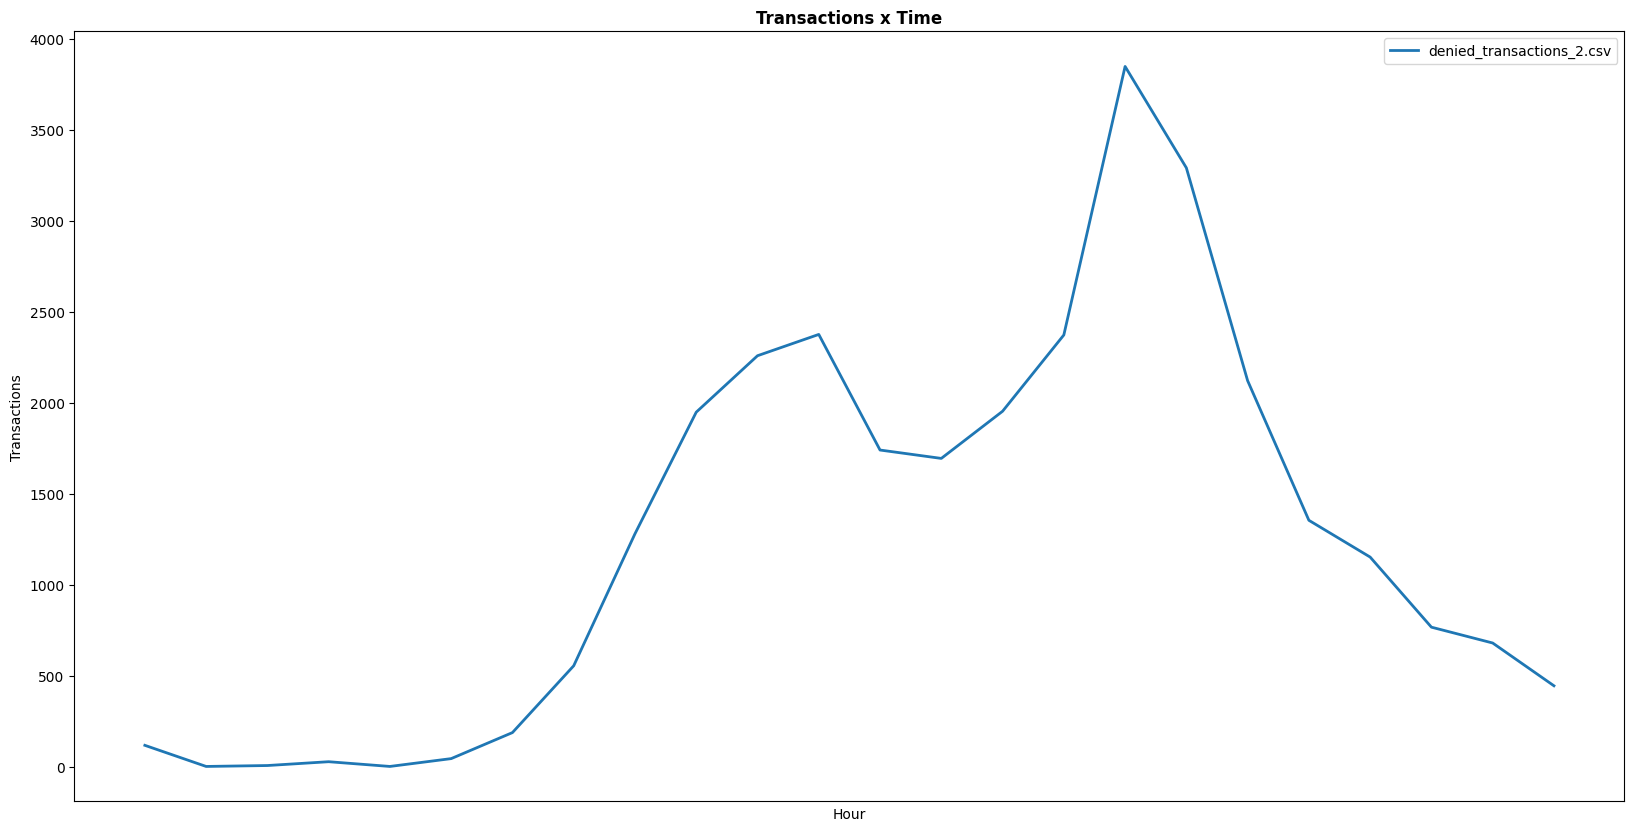

In [5]:
plot_graph_h('transactions_1.csv', 'failed')
plot_graph_h('transactions_2.csv', 'failed')
plot_graph_h('transactions_1.csv', 'reversed')
plot_graph_h('transactions_2.csv', 'reversed')
plot_graph_h('transactions_1.csv', 'denied')
plot_graph_h('transactions_2.csv', 'denied')

In [6]:
# FUNÇÃO PARA DEFINIÇÃO DO ALARME
# rule-based - you define which cases get alerted based on predefined rules

def status_trans_min(doc, status):

    import pandas as pd
    import pandasql as ps

    data = pd.read_csv(doc)

    data_total_minutes = ps.sqldf("""
    SELECT
        COUNT (ALL time) AS "total_minutes_count"
    FROM
        (SELECT DISTINCT time FROM data)
    """)

    data_total_count = ps.sqldf("""
    SELECT
        SUM (ALL count) AS "total_count"
    FROM
        data
    """)

    data_search = ps.sqldf(f"""
    SELECT
        SUM (ALL count) AS "status_count",
        COUNT (ALL count) AS "status_minutes_count"
    FROM
        data
    WHERE
        status = "{status}"
    """)

    total_trans_min = round(float((data_total_count.iloc[:,0].values / data_total_minutes.iloc[:,0].values)), 2)
    status_trans_min = round(float((data_search.iloc[:,0].values / data_search.iloc[:,1].values)), 2)
    status_percent = round(float((status_trans_min / total_trans_min)*100), 2)
    print(f"No documento \033[1m{doc}\033[0;0m \033[1m{status_percent}%\033[0;0m das transação por minuto foram \033[1m{status}\033[0;0m")

In [7]:
status_trans_min('transactions_1.csv', 'failed')
status_trans_min('transactions_2.csv', 'failed')
status_trans_min('transactions_1.csv', 'reversed')
status_trans_min('transactions_2.csv', 'reversed')
status_trans_min('transactions_1.csv', 'denied')
status_trans_min('transactions_2.csv', 'denied')

No documento transactions_1.csv 0.66% das transação por minuto foram failed
No documento transactions_2.csv 3.23% das transação por minuto foram failed
No documento transactions_1.csv 11.52% das transação por minuto foram reversed
No documento transactions_2.csv 0.97% das transação por minuto foram reversed
No documento transactions_1.csv 11.9% das transação por minuto foram denied
No documento transactions_2.csv 11.06% das transação por minuto foram denied


*** DEFINIÇÃO DOS ALARMES ***

A partir dos valores percentuais encontrados nos dados estipulei a premissa para alerta:
- Failed: 0.70% (1 a cada 143 transações) - Transactions_1
- Reversed: 1,00% (1 a cada 100 transações) - Transactions_2
- Denied: 11,50% (1 a cada 9 transações) - Média da Transactions_1 e Transactions_2

*** PREMISSAS ***

1. Considera-se que existe um arquivo .csv que é atualizado a cada minuto.

In [8]:
# PROGRAMA

# def csv_update(doc):

import pandas as pd
import os
import time

doc = 'transactions_1_TESTE.csv'

last_modified = None
last_lines = 0

print('''--- Welcome to the CloudWalk Monitoring Transactons ---\n
Our alarm premises are:
\033[1mFailed Status\033[0;0m: 0,70%
\033[1mReversed Status\033[0;0m: 1,00%
\033[1mDenied Status\033[0;0m: 11,50%
''')

while True:
    current_modified = os.path.getmtime(doc)
    if current_modified != last_modified:
        last_modified = current_modified
        try:
            data = pd.read_csv(doc, skiprows=range(1, last_lines+1))
            if not data.empty:
                status_trans_min(doc, 'failed', len(data))
                status_trans_min(doc, 'reversed', len(data))
                status_trans_min(doc, 'denied', len(data))
                last_lines += len(data)
                print("\n")
        except:
            print("Sorry, but you have some error :(")
    else:
        print(f"The file \033[1m{doc}\033[0;0m has not been updated !!!\n")

    time.sleep(10)

--- Welcome to the CloudWalk Monitoring Transactons ---

Our alarm premises are:
Failed Status: 0,70%
Reversed Status: 1,00%
Denied Status: 11,50%

Sorry, but you have some error :(
The file transactions_1_TESTE.csv has not been updated !!!

The file transactions_1_TESTE.csv has not been updated !!!

The file transactions_1_TESTE.csv has not been updated !!!



KeyboardInterrupt: 

In [ ]:
# FUNÇÃO DE TESTE PARA ALERTA - ANÁLISE DO ÚLTIMO MINUTO

def status_trans_min(doc, status, new_lines):

    import pandas as pd
    import pandasql as ps

    data = pd.read_csv(doc)

    data_total_count = ps.sqldf(f"""
    SELECT
        SUM(count) AS "total__count"
    FROM (
        SELECT count
        FROM data
        ORDER BY time DESC
        LIMIT {new_lines})
    """)

    data_search = ps.sqldf(f"""
    SELECT
        SUM(count) AS "status__count" 
    FROM (
        SELECT status, count
        FROM data
        ORDER BY time DESC
        LIMIT {new_lines})
        WHERE status = "{status}"
    """)

    total_trans_min = round(float((data_total_count.iloc[:,0].values / 1)), 2)
    if data_search.iloc[:,0].values != None:
        status_trans_min = round(float((data_search.iloc[:,0].values / 1)), 2)
        status_percent = round(float((status_trans_min / total_trans_min)*100), 2)

        # COMPARAR COM METAS E VER SE ESTÁ FORA OU NÃO

        failed_alert = 0.70
        reversed_alert = 1.00
        denied_alert = 11.50

        if status == 'failed':
            target = total_trans_min*(failed_alert/100)
            if status_percent > failed_alert:
                print(f"Teste {status} ativou o alerta, considerando percentual {failed_alert}% e o registro foi de {status_percent}%")
                # CHAMA FUNÇÃO GRÁFICO
                plot_graph_min(doc, status, target)
                # CHAMA FUNÇÃO ENVIAR EMAIL
            else:
                print(f"No último minuto as transações do tipo \033[1m{status} ficaram dentro da meta\033[0;0m: {status_percent}% (Meta: {failed_alert}%)")
        elif status == 'reversed':
            target = total_trans_min*(reversed_alert/100)
            if status_percent > reversed_alert:
                print(f"Teste {status} ativou o alerta, considerando percentual {reversed_alert}% e o registro foi de {status_percent}%")
                # CHAMA FUNÇÃO GRÁFICO
                
                # CHAMA FUNÇÃO ENVIAR EMAIL
            else:
                print(f"No último minuto as transações do tipo \033[1m{status} ficaram dentro da meta\033[0;0m: {status_percent}% (Meta: {reversed_alert}%)")
        elif status == 'denied':
            target = total_trans_min*(denied_alert/100)
            if status_percent > denied_alert:
                print(f"Teste {status} ativou o alerta, considerando percentual {denied_alert}% e o registro foi de {status_percent}%")
                # CHAMA FUNÇÃO GRÁFICO
                plot_graph_min(doc, status, target)
                # CHAMA FUNÇÃO ENVIAR EMAIL
            else:
                print(f"No último minuto as transações do tipo \033[1m{status} ficaram dentro da meta\033[0;0m: {status_percent}% (Meta: {denied_alert}%)")
    else:
        print(f"No último minuto \033[1mnão houve transação\033[0;0m do tipo: \033[1m{status}\033[0;0m")

Teste failed ativou o alerta, considerando percentual 0.7% e o registro foi de 4.0%


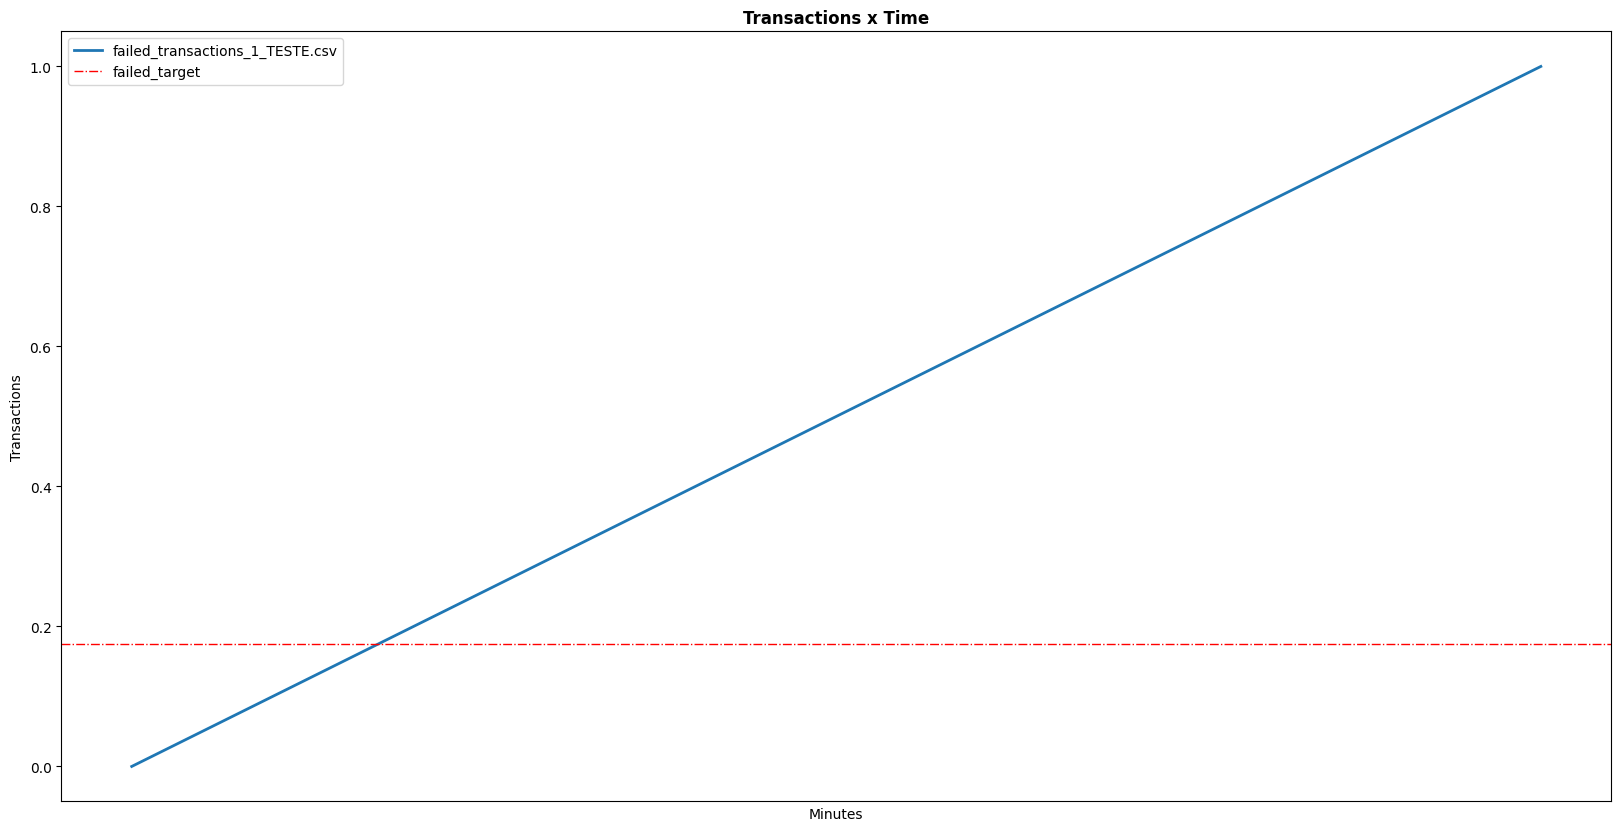

No último minuto não houve transação do tipo: reversed
Teste denied ativou o alerta, considerando percentual 11.5% e o registro foi de 24.0%


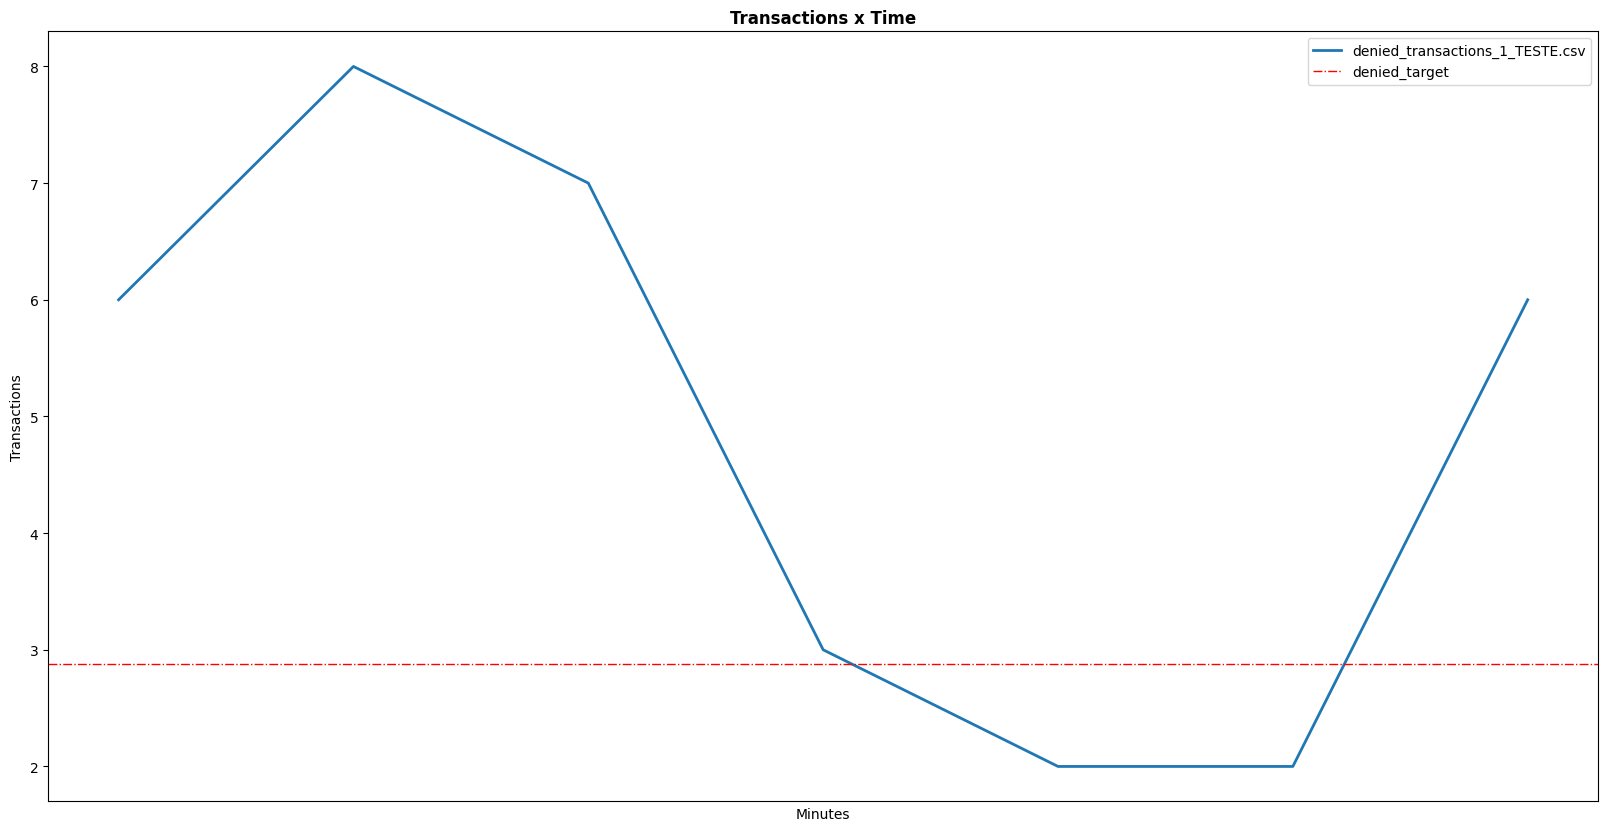

In [ ]:
doc = 'transactions_1_TESTE.csv'

status_trans_min(doc, 'failed', 4)
status_trans_min(doc, 'reversed', 4)
status_trans_min(doc, 'denied', 4)
